# Document Classification with Naive Bayes - Lab

## Introduction

In this lesson, you'll practice implementing the Naive Bayes algorithm on your own.

## Objectives

In this lab you will:  

* Implement document classification using Naive Bayes

## Import the dataset

To start, import the dataset stored in the text file `'SMSSpamCollection'`.

In [24]:
# Import the data
import pandas as pd
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Account for class imbalance

To help your algorithm perform more accurately, subset the dataset so that the two classes are of equal size. To do this, keep all of the instances of the minority class (spam) and subset examples of the majority class (ham) to an equal number of examples.

In [25]:
# Your code here
minority = df[df['label'] == 'spam']
undersampled_majority = df[df['label'] == 'ham'].sample(n=len(minority))
df2 = pd.concat([minority, undersampled_majority])
df2.label.value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [26]:
p_classes = dict(df2['label'].value_counts(normalize=True))
p_classes

{'ham': 0.5, 'spam': 0.5}

In [27]:
df2.iloc[0]

label                                                 spam
text     Free entry in 2 a wkly comp to win FA Cup fina...
Name: 2, dtype: object

## Train-test split

Now implement a train-test split on the dataset: 

In [28]:
from sklearn.model_selection import train_test_split
X = df2['text']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

## Create the word frequency dictionary for each class

Create a word frequency dictionary for each class: 

In [29]:
# Will be a nested dictionary of class_i : {word1:freq, word2:freq..., wordn:freq},.... class_m : {}
class_word_freq = {} 
classes = train_df['label'].unique()
for class_ in classes:
    temp_df = train_df[train_df['label'] == class_]
    bag = {}
    for row in temp_df.index:
        doc = temp_df['text'][row]
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
    class_word_freq[class_] = bag

## Count the total corpus words
Calculate V, the total number of words in the corpus: 

In [30]:
vocabulary = set()
for text in train_df['text']:
    for word in text.split():
        vocabulary.add(word)
V = len(vocabulary)
V

5998

## Create a bag of words function

Before implementing the entire Naive Bayes algorithm, create a helper function `bag_it()` to create a bag of words representation from a document's text.

In [31]:
def bag_it(doc):
    bag = {}
    for word in doc.split():
        bag[word] = bag.get(word, 0) + 1
    return bag

## Implementing Naive Bayes

Now, implement a master function to build a naive Bayes classifier. Be sure to use the logarithmic probabilities to avoid underflow.

In [32]:
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    classes = []
    posteriors = []
    for class_ in class_word_freq.keys():
        p = np.log(p_classes[class_])
        for word in bag.keys():
            num = bag[word]+1
            denom = class_word_freq[class_].get(word, 0) + V
            p += np.log(num/denom)
        classes.append(class_)
        posteriors.append(p)
    if return_posteriors:
        print(posteriors)
    return classes[np.argmax(posteriors)]

## Test your classifier

Finally, test your classifier and measure its accuracy. Don't be perturbed if your results are sub-par; industry use cases would require substantial additional preprocessing before implementing the algorithm in practice.

In [33]:
import numpy as np

y_hat_train = X_train.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_train == y_hat_train
residuals.value_counts(normalize=True)

False    0.752679
True     0.247321
dtype: float64

In [34]:
y_hat_test = X_test.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_test == y_hat_test
residuals.value_counts(normalize=True)

False    0.719251
True     0.280749
dtype: float64

              precision    recall  f1-score   support

         ham       0.35      0.58      0.44       180
        spam       0.01      0.01      0.01       194

    accuracy                           0.28       374
   macro avg       0.18      0.29      0.22       374
weighted avg       0.18      0.28      0.21       374



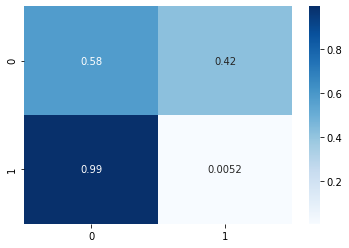

In [35]:
## USING SKLEARN 
from sklearn import metrics
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,y_hat_test,normalize='true'),
            annot=True,cmap='Blues')
print(metrics.classification_report(y_test,y_hat_test))

# Using Built-in Naive Bayes with `sklearn` with NLP 


In [36]:
from nltk.corpus import stopwords
from string import punctuation
stopwords_list = stopwords.words('english')
stopwords_list += punctuation
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
 df2['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords_list)

In [39]:
X = df2['text']
y = df2['label'].copy()

X_train, X_test, y_train,y_test =train_test_split(X, y,random_state=17)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec

<1120x3741 sparse matrix of type '<class 'numpy.int64'>'
	with 12992 stored elements in Compressed Sparse Row format>

In [40]:
vectorizer.inverse_transform(X_test_vec[1])

[array(['give', 'miss', 'number', 'one', 'please'], dtype='<U28')]

              precision    recall  f1-score   support

         ham       0.98      0.95      0.96       180
        spam       0.95      0.98      0.97       194

    accuracy                           0.97       374
   macro avg       0.97      0.96      0.97       374
weighted avg       0.97      0.97      0.97       374



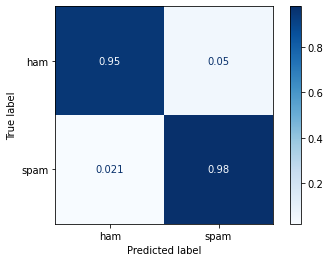

In [41]:
## Using  sklearn MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec,y_train)

y_hat_test = model.predict(X_test_vec)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(model,X_test_vec,y_test,cmap='Blues', normalize='true')
# y_test.value_counts(normalize=True)

In [42]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [43]:
vocab = vectorizer.vocabulary_
len(vocab)

3741

In [44]:
model.n_features_

3741

## Level up (Optional)

Rework your code into an appropriate class structure so that you could easily implement the algorithm on any given dataset.

## My Way - OOP & sklearn

In [45]:
## Combine class dicts
def join_freq_dicts(*ds):
    """Combines any number of frequency word dicts"""
    D = {}
    for d in ds:
        for k,v in d.items():
            cur_v = D.get(k,0)
            D[k] = cur_v+v
    return D

### Making your own sklearn estimator

- http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

- https://scikit-learn.org/stable/developers/develop.html

In [46]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import BaseEstimator,ClassifierMixin

class Bayes(ClassifierMixin,BaseEstimator):

    def __init__(self,*args,**kwargs):
        self._id = 'Bayesian Classification built on top of sklearn.'
        
    def fit(self, X_train,y_train,class_priors=None):
        """After fitting, model will have .classes_, 
        .class_word_freq, .class_priors"""
        
        class_word_freq = {} 
        classes = list(y_train.unique())
        self.classes_ = classes
        
        vocab ={}
        for class_ in classes:
            temp_df = X_train[y_train == class_]
            bag = {}
            for row in temp_df.index:
                doc = temp_df[row]
                for word in doc.split():
                    bag[word] = bag.get(word, 0) + 1
            class_word_freq[class_] = bag
        
        self.class_word_freq = class_word_freq
        
        if class_priors == None:
            class_priors = dict(y_train.value_counts(normalize=True))
            
        self.class_priors_ =class_priors 
        self.class_counts_ = dict(y_train.value_counts(normalize=False))
        self.vocab = join_freq_dicts(*list(class_word_freq.values()))
        self.vocab_size = len(self.vocab)
        self.fitted_ = True
        
        
    ## Solution way
    def bag_it(self,doc):
        bag = {}
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
        return bag

        
    @staticmethod
    def join_freq_dicts(*ds):
        D = join_freq_dicts(*ds)
        return D
    
    
    def __repr__(self):
        output = [['Class','Count','Prior','Vocab Size']]
        for class_ in self.classes_:
            data = [class_,self.class_counts_[class_], self.class_priors_[class_],
            len(self.class_word_freq[class_])]
            output.append(data)

        display(pd.DataFrame(output[1:],columns=output[0]))
        return self._id
    
    def __str__(self):
        output = [['Class','Count','Prior','Vocab Size']]
        for class_ in self.classes_:
            data = [class_,self.class_counts_[class_], self.class_priors_[class_],
            len(self.class_word_freq[class_])]
            output.append(data)

        print(pd.DataFrame(output[1:],columns=output[0]))
        return self._id

## NOTE TO SELF: FIX PREDICT? Match X_train.map appraoch from above 09/27/20    
    def predict(self, X):#, ):
        return_posteriors=False
        p_classes = self.class_priors_
        V = self.vocab_size
        class_word_freq = self.class_word_freq
        preds = [ ]
        for doc in X:

            bag = self.bag_it(doc)
            classes = []
            posteriors = []

            for class_ in class_word_freq.keys():
                p = np.log(p_classes[class_])

                for word in bag.keys():
                    num = bag[word]+1
                    denom = class_word_freq[class_].get(word, 0) + V
                    p += np.log(num/denom)
                classes.append(class_)
                posteriors.append(p)

            if return_posteriors:
                preds.append(posteriors)
                
            else:
                preds.append(classes[np.argmax(posteriors)])
        return pd.Series(preds, index=X.index)

    
    def predict_proba(self, X):#, ):
        return_posteriors=False
        p_classes = self.class_priors_
        V = self.vocab_size
        class_word_freq = self.class_word_freq
        preds = [ ]
        for doc in X:

            bag = self.bag_it(doc)
            classes = []
            posteriors = []

            for class_ in class_word_freq.keys():
                p = np.log(p_classes[class_])

                for word in bag.keys():
                    num = bag[word]+1
                    denom = class_word_freq[class_].get(word, 0) + V
                    p += np.log(num/denom)
                classes.append(class_)
                posteriors.append(p)

            if return_posteriors:
                preds.append(posteriors)
                
            else:
                preds.append(classes[np.argmax(posteriors)])
        return pd.Series(preds, index=X.index)

In [47]:
model = Bayes()
model.fit(X_train,y_train,class_priors=None)#p_classes)
y_hat_train_prob = model.predict_proba(X_train)#,return_posteriors=True)
y_hat_train_prob

588      ham
312      ham
844      ham
631      ham
2655     ham
        ... 
2987     ham
1964     ham
910      ham
29      spam
4616     ham
Length: 1120, dtype: object

In [48]:
model

,Class,Count,Prior,Vocab Size
0,ham,567,0.50625,2955
1,spam,553,0.49375,3628


Bayesian Classification built on top of sklearn.

              precision    recall  f1-score   support

         ham       0.45      0.87      0.59       180
        spam       0.00      0.00      0.00       194

    accuracy                           0.42       374
   macro avg       0.22      0.44      0.30       374
weighted avg       0.22      0.42      0.28       374

0.4197860962566845


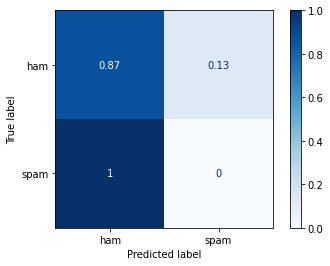

In [50]:
from sklearn import metrics
model = Bayes()
model.fit(X_train,y_train,class_priors=None)#p_classes)
y_hat_train = model.predict(X_train)#,return_posteriors=True)
y_hat_test = model.predict(X_test)

print(metrics.classification_report(y_test,y_hat_test))
print(model.score(X_test,y_test))
metrics.plot_confusion_matrix(model,X_test,y_test,cmap="Blues",
                             normalize='true')


## Summary

Well done! In this lab, you practiced implementing Naive Bayes for document classification!